In [96]:
import pandas as pd
import matplotlib.pyplot as plt

In [97]:
data = pd.read_csv('../data/preprocessed_data.csv')

In [98]:
data.shape

(10680, 29)

In [99]:
data.columns

Index(['Benchmark', 'Input Size', 'Threads', 'cycles', 'instructions',
       'ins_per_cycle', 'cache_references', 'cache_misses',
       'cache_misses_percent', 'branches_instructions', 'branch_misses',
       'bus_cycles', 'ref_cycles', 'cpu_clock', 'cpu_migrations',
       'major_faults', 'minor_faults', 'page_faults', 'LLC_loads',
       'LLC_load_misses', 'LLC_misses_percent', 'LLC_stores',
       'LLC_store_misses', 'LLC_store_misses_percent', 'time', 'user_time',
       'sys_time', 'avg_time', 'Speedup'],
      dtype='object')

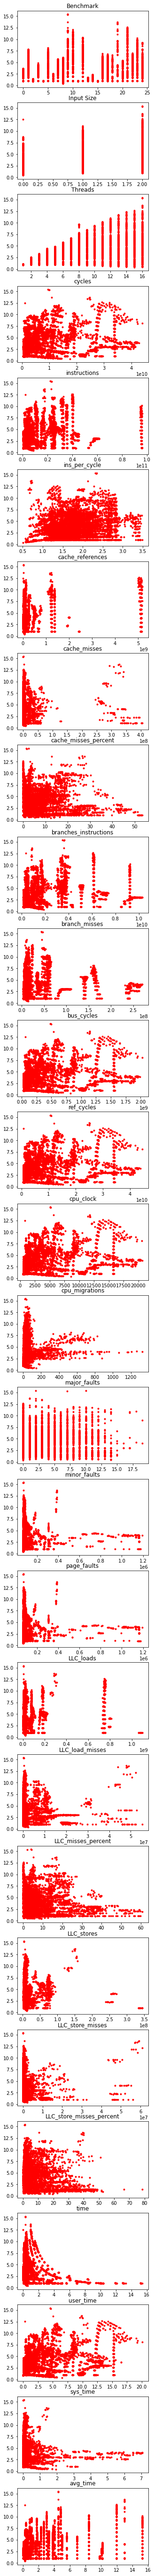

In [100]:
fig, ax = plt.subplots(nrows=28, ncols=1, figsize=(5, 100))
for i in range(len(data.columns)-1):
    ax[i].plot(data[data.columns[i]],data['Speedup'],'.r')

for i in range(len(data.columns)-1):
    ax[i].set_title(data.columns[i])